# Predicción Lending Club 

**Fecha: 04/12/2020**

#### **Autores: Germán de los Mozos y Miguel González Cobaleda**

**Email**: miguel.gcobaleda@cunef.edu y german.delosmozos@cunef.edu

El objetivo de este trabajo es poder predecir si un cliente de Lending Club hará un incumplimineto del pago de un crédito o no lo hará.
Para conseguir esto vamos a explorar el dataset, analizaremos los datos y probaremos varios modelos predictivos, considerando el mejor modelo el que mayor accuracy y menor overfitting tenga.
El dataset con el que vamos a trabajar posee una serie de variables sobre individuos a los que se les ha concedido un crédito

* Primero leemos los datos mostrando.
* Elección de las variables más importantes del conjunto de datos.
* Filtramos los datos y realizamos el análisis exploratorio.
* Por último, la realización de los modelos predictivos.



Antes de empezar importaremos las bibliotecas necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualización
import matplotlib.pyplot as plt #visualización
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) # Para que muestre todas las columnas de los dataset y no solo el principio y el final
pd.set_option('display.max_rows', None) # lo mismo pero para las filas

### LECTURA DE DATOS

Los datos los encontramos en 4 csv diferentes por lo que precederemos a cargarlos y después utilizaremos la función de pandas concat para unirlos en un único dataset que es sobre el que trabajaremos.

In [3]:
df1 = pd.read_csv('../data/Loan_training_set_1_4.csv', skiprows=1, low_memory=False) # Utilizamos skiprows para eliminar la primera linea
                                                                                     # la cual no aporta valor
df2 = pd.read_csv('../data/Loan_training_set_2_4.csv', skiprows=1, low_memory=False)
df3 = pd.read_csv('../data/Loan_training_set_3_4.csv', skiprows=1, low_memory=False)
df4 = pd.read_csv('../data/Loan_training_set_4_4.csv', skiprows=1, low_memory=False)

In [4]:
df = pd.concat([df1, df2, df3, df4])

### OBSERVACIÓN DEL DATASET Y ANÁLISIS EXPLORATORIO

Para ver la dimensión de nuestro dataset utilizamos la función shape.
Como se observa tiene 884.884 observaciones y 151 variables

In [5]:
df.shape

(884884, 151)

Gracias a la función de pandas 'dtypes', podemos observar el nombre de las variables y tipo de datos tienen

In [6]:
df.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

A continuación cargamos las 5 primeras filas para ver las primeras observaciones

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,112435993,NaN,2300.0,2300.0,2300.0,36 months,12.62%,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0.0,Sep-1985,700.0,704.0,1.0,NaN,NaN,4.0,0.0,3911.0,55.1%,6.0,w,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,3911.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0,2.0,978.0,440.0,87.1,0.0,0.0,NaN,381.0,8.0,8.0,0.0,15.0,NaN,0.0,NaN,0.0,2.0,3.0,2.0,2.0,0.0,4.0,6.0,3.0,4.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,7100.0,3911.0,3400.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,112290210,NaN,16000.0,16000.0,16000.0,60 months,12.62%,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0.0,Jun-1992,715.0,719.0,0.0,NaN,NaN,9.0,0.0,33752.0,105.8%,26.0,w,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,709.0,705.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,234457.0,2.0,1.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0,5.0,26051.0,94.0,96.1,0.0,0.0,26.0,300.0,2.0,2.0,7.0,2.0,NaN,8.0,NaN,0.0,2.0,7.0,2.0,8.0,1.0,7.0,18.0,7.0,9.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,319900.0,44830.0,2400.0,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Ahora veremos si hay observaciones nulas y duplicadas

In [8]:
df.isnull().sum()

id                                                 0
member_id                                     884884
loan_amnt                                          8
funded_amnt                                        8
funded_amnt_inv                                    8
term                                               8
int_rate                                           8
installment                                        8
grade                                              8
sub_grade                                          8
emp_title                                      52701
emp_length                                     51201
home_ownership                                     8
annual_inc                                         8
verification_status                                8
issue_d                                            8
loan_status                                        8
pymnt_plan                                         8
url                                           

Como podemos ver hay muchas columnas con observaciones nulas, las trataremos más adelante

In [9]:
df.duplicated().sum()

0

#### SELECCIÓN DE LA VARIABLE OBJETIVO

El siguiente paso será determinar la variable objetivo. Como nuestro fin es indentificar los clientes que van a impagar elegiremos la variable 'loan_status' o estado del préstamo.

Gracias a la función unique, podemos ver cuantas categorias hay en la columna

In [10]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default', nan], dtype=object)

Como nuestro objetivo es ver los clientes que impagan y los que pagan bien, eliminaremos todas las observaciones en los que el cliente se encuentre pagando el préstamo y no lo haya acabado

In [11]:
df = df[df['loan_status'] != 'Current'] # quitamos current e in grace period porque no nos interesarán estos individuos ya que no sabemos si impagaran
df = df[df['loan_status'] != 'In Grace Period']

In [12]:
df.shape

(456692, 151)

Gracias a este paso, eliminamos la mitad de las observaciones del dataset, lo cual nos será de mucha ayuda ya que nos quedará un dataset mucho más simple

In [13]:
df['loan_status'].unique()

array(['Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'Charged Off', 'Default', nan], dtype=object)

Una vez realizado lo anterior, lo siguiente será codificar la columna con una variable binaria, 1 si ha pagado bien y 0 si no paga bien; esto lo guardamos en una nueva columna a la que llamamos 'resultado'.

In [14]:
df['resultado'] = df['loan_status'].map(lambda x : 1  if x == 'Fully Paid' else 0)


Como último paso, eliminaremos la variable 'loan_status', debido a que ya no será útil

In [15]:
df = df.drop('loan_status', axis=1)

#### ELIMINACIÓN DE VARIABLES

Basado en nuestro conocimiento, seleccionamos una lista de características que creemos que no son relevantes, o que no nos aportan información para predecir el impago, por ello es necesario eliminarlos.

In [16]:
borrar = ['id',
          'int_rate',
          'sub_grade',
          'emp_length',
          'emp_title',
          'url',
          'purpose',
          'addr_state',
          'earliest_cr_line',
          'acc_open_past_24mths',
          'policy_code',
          'chargeoff_within_12_mths',
          'collections_12_mths_ex_med',
          'delinq_2yrs',
          'delinq_amnt',
          'issue_d',
          'initial_list_status',
          'il_util',
          'member_id',
          'mo_sin_old_il_acct',
          'mo_sin_old_rev_tl_op',
          'mo_sin_rcnt_rev_tl_op',
          'mo_sin_rcnt_tl',
          'mths_since_last_delinq',
          'mths_since_last_major_derog',
          'mths_since_last_record',
          'mths_since_rcnt_il',
          'mths_since_recent_bc',
          'mths_since_recent_bc_dlq',
          'mths_since_recent_inq',
          'mths_since_recent_revol_delinq',
          'next_pymnt_d',
          'num_accts_ever_120_pd',
          'num_actv_bc_tl',
          'num_actv_rev_tl',
          'num_bc_sats',
          'num_bc_tl',
          'num_il_tl',
          'num_op_rev_tl',
          'num_rev_accts',
          'num_rev_tl_bal_gt_0',
          'num_sats',
          'num_tl_120dpd_2m',
          'num_tl_30dpd',
          'num_tl_90g_dpd_24m',
          'num_tl_op_past_12m',
          'open_acc_6m',
          'open_il_12m',
          'open_il_24m',
          'open_act_il',
          'open_rv_12m',
          'open_rv_24m',
          'revol_bal',
          'revol_bal_joint',
          'revol_util',
          'total_bal_ex_mort',
          'zip_code',
          'funded_amnt',
          'funded_amnt_inv',
          'hardship_flag']

In [17]:
ndf = df.drop(borrar, axis=1)

#### VALORES NAs

Queremos seleccionar las variables con el mayor número de observaciones posible, y de esta forma poder construir un modelo de predicción más preciso. Después de analiar el porcentaje de los valores NA en nuestras variables, hemos decidido eliminar todas aquellas que contengan más de la mitad de sus valores nulos.

In [22]:
nulosx100 = pd.DataFrame(ndf.isnull().sum()/len(ndf)*100, columns=['nulos'])
filtro = nulosx100['nulos']>50
sin_datos = nulosx100[filtro]
sin_datos.index

Index(['desc', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'total_bal_il', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'se

In [23]:
borrar1 = ['desc',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'total_bal_il',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med', 
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [24]:
ndf = ndf.drop(borrar1, axis=1)

### ANÁLISIS DE CORRELACIÓN

Seleccionamos las variables númericas del dataset y hacemos un análisis de correlaciones.

Posteriormente eliminaremos las variables con alto grado de correlación, el objetivo de eliminar estas variables correlaccionadas es evitar el overfitting.

In [25]:
numericas = ndf.select_dtypes(include = [np.number])

In [26]:
numericas.drop('resultado', axis=1, inplace=True)

C:\Users\Cobaleda\anaconda3\envs\loan\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:>

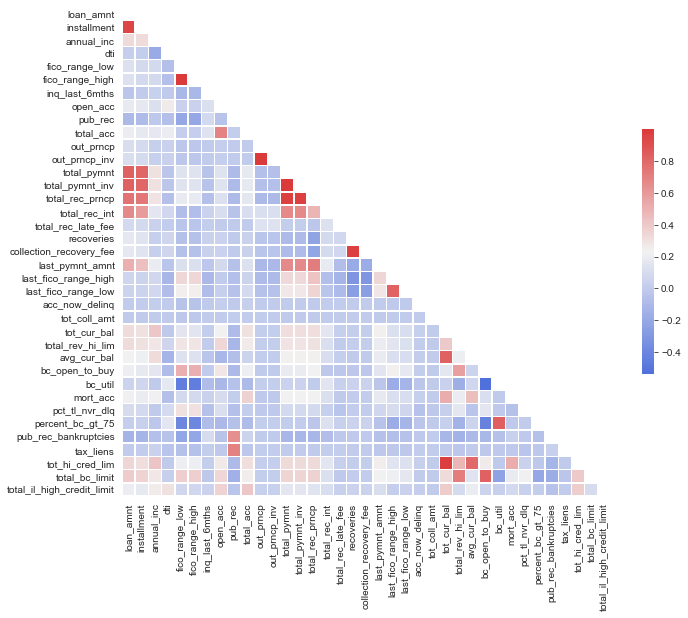

In [27]:
# Creamos un grafico la matriz de correlaciones para observar dichas correlaciones de manera visual, la peculiaridad de este 
# gráfico es que tiene forma de triangulo

corr = numericas.corr()

# enmascaramos los valores de la esquina superuior derecha
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# color de fondo
sns.set_style(style = 'white')

# tamaño del lienzo
f, ax = plt.subplots(figsize=(11, 9))

# Añadimos el color de las correlacciones
cmap = sns.diverging_palette(260, 12, as_cmap=True)

# Dibujamos el grafico de correlacciones
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Eliminamos todas las correladas, y además eliminamos 'grade' y 'title',ya que estos datos ya se incluyen el 'sub_grade' y en 'purpose'.

In [28]:
borrar2 = ['bc_open_to_buy',
         'total_bc_limit',
         'avg_cur_bal',
         'percent_bc_gt_75',
         'pub_rec',
         'grade',
         'title',
         'last_pymnt_d',
         'last_credit_pull_d',
         'debt_settlement_flag',
         'last_pymnt_amnt',
         'pymnt_plan',
         'out_prncp',
         'out_prncp_inv',
         'total_rec_int',
         'total_rec_late_fee',
         'recoveries',
         'collection_recovery_fee',
         'acc_now_delinq',
         'tot_coll_amt',
         'installment',
         'total_pymnt',
         'total_pymnt_inv',
         'total_rec_prncp',
         'total_acc',
         'open_acc',     
         'tot_hi_cred_lim']

In [29]:
ndf = ndf.drop(borrar2, axis=1)

Hemos decidido imputar a los NAs la mediana de cada variable, porque pensamos que imputar la media puede distorsionar en exceso si hay algún valor atípico.

In [30]:
def fill_median(data):
    data.fillna(data.median(), inplace = True)

In [31]:
fill_median(ndf)

A continuación vemos las dimensiones del dataset, como se puede ver hemos eliminado un gran numero de variables y ahora solo tendremos 22.

In [32]:
ndf.shape

(456692, 22)

Exportamos el dataset

In [33]:
ndf.to_csv('../data/ndf.csv')